In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

In [137]:
intersections = pd.read_pickle('../data/processed/intersection_w_normalization.pkl')

In [4]:
intersections.head()

,intkey,name,year,signal_type,arterial_class,subarea,risk
0,29797.0,BROADWAY AND CHERRY ST,2007,CITY,2.0,E,0.000000
1,29797.0,BROADWAY AND CHERRY ST,2008,CITY,2.0,E,0.000000
2,29797.0,BROADWAY AND CHERRY ST,2009,CITY,2.0,E,0.000175
3,29797.0,BROADWAY AND CHERRY ST,2010,CITY,2.0,E,0.000000
4,29797.0,BROADWAY AND CHERRY ST,2011,CITY,2.0,E,0.000000


In [5]:
intersections.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37800 entries, 0 to 37799
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   intkey          37800 non-null  float64
 1   name            37800 non-null  object 
 2   year            37800 non-null  int64  
 3   signal_type     37800 non-null  object 
 4   arterial_class  37776 non-null  float64
 5   subarea         37800 non-null  object 
 6   risk            37800 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 2.3+ MB


In [8]:
intersections['risk'].sort_values()

0        0.000000
22565    0.000000
22564    0.000000
22563    0.000000
22562    0.000000
           ...   
8697     0.002222
2423     0.002250
23558    0.002273
8660     0.002444
8756     0.002444
Name: risk, Length: 37800, dtype: float64

In [113]:
df = pd.read_csv('../data/all_sdot_merged_with_wsdot_080820.csv', low_memory=False)

In [114]:
df.groupby(['LOCATION','YEAR']).count().shape

(119593, 179)

In this study, we're going to focus on intersections

In [115]:
df = df[df['ADDRTYPE'] == 'Intersection']

In [116]:
df.groupby(['LOCATION','YEAR']).count()['STATUS']

LOCATION                        YEAR
10TH AVE AND E ALDER ST         2014    1
10TH AVE AND E JEFFERSON ST     2006    1
                                2007    2
                                2008    1
                                2009    1
                                       ..
YALE AVE E AND E ROANOKE ST     2015    1
                                2018    1
YUKON AVE S AND S HENDERSON ST  2005    1
                                2016    1
                                2017    1
Name: STATUS, Length: 38142, dtype: int64

In [120]:
df = df.set_index(['LOCATION', 'YEAR'])

In [121]:
count_df = pd.DataFrame(df.groupby(level=[0,1]).count()['STATUS'])

In [122]:
count_df = count_df.rename(columns={'STATUS' : 'COUNT'})

In [123]:
count_df.head(25)

COUNT
LOCATION                    YEAR       
10TH AVE AND E ALDER ST     2014      1
10TH AVE AND E JEFFERSON ST 2006      1
                            2007      2
                            2008      1
                            2009      1
                            2014      1
                            2016      1
                            2017      2
                            2019      2
10TH AVE AND E MADISON ST   2005      3
                            2007      1
                            2009      1
                            2010      1
                            2012      1
                            2013      1
                            2014      1
                            2019      1
10TH AVE AND E PIKE ST      2004      1
                            2005      1
                            2006      2
                            2007      2
                            2009      3
                            2013      1
                            2014      2
                            2016      5

In [124]:
count_df['COUNT'].value_counts()

1     23195
2      7346
3      3330
4      1730
5      1004
6       598
7       332
8       228
9       145
10       87
11       53
12       33
13       24
14       10
16        7
15        6
17        3
18        3
24        2
20        2
19        1
21        1
22        1
27        1
Name: COUNT, dtype: int64

Adding Features of Crash Severity

In [125]:
df.groupby(level=[0,1])['TOTAL FATALITIES'].sum()

LOCATION                        YEAR
10TH AVE AND E ALDER ST         2014    0.0
10TH AVE AND E JEFFERSON ST     2006    0.0
                                2007    0.0
                                2008    0.0
                                2009    0.0
                                       ... 
YALE AVE E AND E ROANOKE ST     2015    0.0
                                2018    0.0
YUKON AVE S AND S HENDERSON ST  2005    0.0
                                2016    0.0
                                2017    0.0
Name: TOTAL FATALITIES, Length: 38142, dtype: float64

Let's add this as a column to the count_df

We noticed by limiting the scope to only consider intersections, fatalities are a lot less, with 2 or more deaths from collisions completely disappearing.

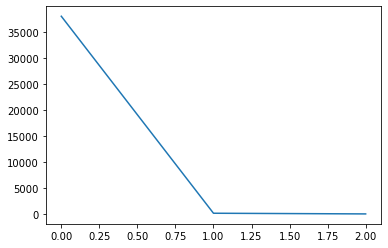

In [133]:
df.groupby(level=[0,1])['TOTAL FATALITIES'].sum().value_counts().plot()

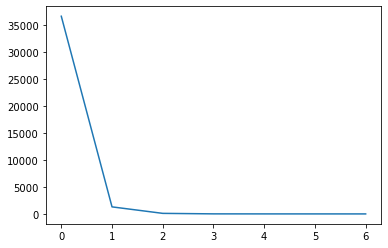

In [132]:
df.groupby(level=[0,1])['TOTAL SERIOUS INJURIES'].sum().value_counts().plot()

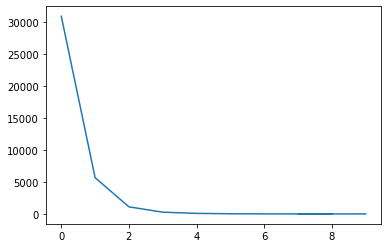

In [131]:
df.groupby(level=[0,1])['TOTAL EVIDENT INJURIES'].sum().value_counts().plot()

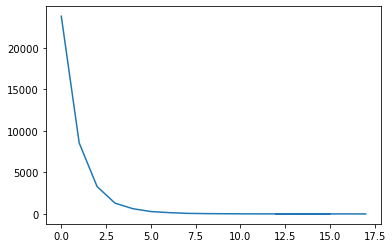

In [130]:
df.groupby(level=[0,1])['TOTAL POSSIBLE INJURIES'].sum().value_counts().plot()

In [134]:
count_df['TOTAL FATALITIES'] = df.groupby(level=[0,1])['TOTAL FATALITIES'].sum()
count_df['TOTAL SERIOUS INJURIES'] = df.groupby(level=[0,1])['TOTAL SERIOUS INJURIES'].sum()
count_df['TOTAL EVIDENT INJURIES'] = df.groupby(level=[0,1])['TOTAL EVIDENT INJURIES'].sum()
count_df['TOTAL POSSIBLE INJURIES'] = df.groupby(level=[0,1])['TOTAL POSSIBLE INJURIES'].sum()

In [135]:
count_df

COUNT  TOTAL FATALITIES  \
LOCATION                       YEAR                            
10TH AVE AND E ALDER ST        2014      1               0.0   
10TH AVE AND E JEFFERSON ST    2006      1               0.0   
                               2007      2               0.0   
                               2008      1               0.0   
                               2009      1               0.0   
...                                    ...               ...   
YALE AVE E AND E ROANOKE ST    2015      1               0.0   
                               2018      1               0.0   
YUKON AVE S AND S HENDERSON ST 2005      1               0.0   
                               2016      1               0.0   
                               2017      1               0.0   

                                     TOTAL SERIOUS INJURIES  \
LOCATION                       YEAR                           
10TH AVE AND E ALDER ST        2014                     0.0   
10TH AVE AND E JEFFERSON ST    2006                     0.0   
                               2007                     0.0   
                               2008                     0.0   
                               2009                     0.0   
...                                                     ...   
YALE AVE E AND E ROANOKE ST    2015                     0.0   
                               2018                     0.0   
YUKON AVE S AND S HENDERSON ST 2005                     0.0   
                               2016                     0.0   
                               2017                     0.0   

                                     TOTAL EVIDENT INJURIES  \
LOCATION                       YEAR                           
10TH AVE AND E ALDER ST        2014                     0.0   
10TH AVE AND E JEFFERSON ST    2006                     0.0   
                               2007                     0.0   
                               2008                     0.0   
                               2009                     0.0   
...                                                     ...   
YALE AVE E AND E ROANOKE ST    2015                     0.0   
                               2018                     0.0   
YUKON AVE S AND S HENDERSON ST 2005                     0.0   
                               2016                     0.0   
                               2017                     0.0   

                                     TOTAL POSSIBLE INJURIES  
LOCATION                       YEAR                           
10TH AVE AND E ALDER ST        2014                      0.0  
10TH AVE AND E JEFFERSON ST    2006                      0.0  
                               2007                      0.0  
                               2008                      0.0  
                               2009                      0.0  
...                                                      ...  
YALE AVE E AND E ROANOKE ST    2015                      0.0  
                               2018                      0.0  
YUKON AVE S AND S HENDERSON ST 2005                      1.0  
                               2016                      1.0  
                               2017                      0.0  

[38142 rows x 5 columns]

In [138]:
intersections = intersections.set_index(['name', 'year'])

In [139]:
intersections

intkey signal_type  arterial_class  \
name                             year                                         
BROADWAY AND CHERRY ST           2007   29797.0        CITY             2.0   
                                 2008   29797.0        CITY             2.0   
                                 2009   29797.0        CITY             2.0   
                                 2010   29797.0        CITY             2.0   
                                 2011   29797.0        CITY             2.0   
...                                         ...         ...             ...   
KIRKWOOD PL N AND MERIDIAN AVE N 2014  275715.0        NONE             3.0   
                                 2015  275715.0        NONE             3.0   
                                 2016  275715.0        NONE             3.0   
                                 2017  275715.0        NONE             3.0   
                                 2018  275715.0        NONE             3.0   

                                       subarea      risk  
name                             year                     
BROADWAY AND CHERRY ST           2007        E  0.000000  
                                 2008        E  0.000000  
                                 2009        E  0.000175  
                                 2010        E  0.000000  
                                 2011        E  0.000000  
...                                        ...       ...  
KIRKWOOD PL N AND MERIDIAN AVE N 2014  LKUN-NW  0.000000  
                                 2015  LKUN-NW  0.000000  
                                 2016  LKUN-NW  0.000000  
                                 2017  LKUN-NW  0.000000  
                                 2018  LKUN-NW  0.000173  

[37800 rows x 5 columns]

In [140]:
count_df.join(intersections, on=['LOCATION', 'YEAR'])

COUNT  TOTAL FATALITIES  \
LOCATION                       YEAR                            
10TH AVE AND E ALDER ST        2014      1               0.0   
10TH AVE AND E JEFFERSON ST    2006      1               0.0   
                               2007      2               0.0   
                               2008      1               0.0   
                               2009      1               0.0   
...                                    ...               ...   
YALE AVE E AND E ROANOKE ST    2015      1               0.0   
                               2018      1               0.0   
YUKON AVE S AND S HENDERSON ST 2005      1               0.0   
                               2016      1               0.0   
                               2017      1               0.0   

                                     TOTAL SERIOUS INJURIES  \
LOCATION                       YEAR                           
10TH AVE AND E ALDER ST        2014                     0.0   
10TH AVE AND E JEFFERSON ST    2006                     0.0   
                               2007                     0.0   
                               2008                     0.0   
                               2009                     0.0   
...                                                     ...   
YALE AVE E AND E ROANOKE ST    2015                     0.0   
                               2018                     0.0   
YUKON AVE S AND S HENDERSON ST 2005                     0.0   
                               2016                     0.0   
                               2017                     0.0   

                                     TOTAL EVIDENT INJURIES  \
LOCATION                       YEAR                           
10TH AVE AND E ALDER ST        2014                     0.0   
10TH AVE AND E JEFFERSON ST    2006                     0.0   
                               2007                     0.0   
                               2008                     0.0   
                               2009                     0.0   
...                                                     ...   
YALE AVE E AND E ROANOKE ST    2015                     0.0   
                               2018                     0.0   
YUKON AVE S AND S HENDERSON ST 2005                     0.0   
                               2016                     0.0   
                               2017                     0.0   

                                     TOTAL POSSIBLE INJURIES   intkey  \
LOCATION                       YEAR                                     
10TH AVE AND E ALDER ST        2014                      0.0      NaN   
10TH AVE AND E JEFFERSON ST    2006                      0.0      NaN   
                               2007                      0.0      NaN   
                               2008                      0.0      NaN   
                               2009                      0.0      NaN   
...                                                      ...      ...   
YALE AVE E AND E ROANOKE ST    2015                      0.0      NaN   
                               2018                      0.0      NaN   
YUKON AVE S AND S HENDERSON ST 2005                      1.0      NaN   
                               2016                      1.0  35272.0   
                               2017                      0.0  35272.0   

                                    signal_type  arterial_class subarea  \
LOCATION                       YEAR                                       
10TH AVE AND E ALDER ST        2014         NaN             NaN     NaN   
10TH AVE AND E JEFFERSON ST    2006         NaN             NaN     NaN   
                               2007         NaN             NaN     NaN   
                               2008         NaN             NaN     NaN   
                               2009         NaN             NaN     NaN   
...                                         ...             ...     ...   
YALE AVE E AND

In [141]:
count_df.index

MultiIndex([(       '10TH AVE AND E ALDER ST', 2014),
            (   '10TH AVE AND E JEFFERSON ST', 2006),
            (   '10TH AVE AND E JEFFERSON ST', 2007),
            (   '10TH AVE AND E JEFFERSON ST', 2008),
            (   '10TH AVE AND E JEFFERSON ST', 2009),
            (   '10TH AVE AND E JEFFERSON ST', 2014),
            (   '10TH AVE AND E JEFFERSON ST', 2016),
            (   '10TH AVE AND E JEFFERSON ST', 2017),
            (   '10TH AVE AND E JEFFERSON ST', 2019),
            (     '10TH AVE AND E MADISON ST', 2005),
            ...
            (    'YALE AVE E AND E NEWTON ST', 2011),
            (    'YALE AVE E AND E NEWTON ST', 2013),
            (    'YALE AVE E AND E NEWTON ST', 2016),
            (   'YALE AVE E AND E ROANOKE ST', 2009),
            (   'YALE AVE E AND E ROANOKE ST', 2010),
            (   'YALE AVE E AND E ROANOKE ST', 2015),
            (   'YALE AVE E AND E ROANOKE ST', 2018),
            ('YUKON AVE S AND S HENDERSON ST', 2005),
            

In [149]:
count_df_full = count_df.join(df, on=['LOCATION','YEAR'], how='left', lsuffix=' ALL')

In [150]:
count_df_full

COUNT  TOTAL FATALITIES ALL  \
LOCATION                       YEAR                                
10TH AVE AND E ALDER ST        2014      1                   0.0   
10TH AVE AND E JEFFERSON ST    2006      1                   0.0   
                               2007      2                   0.0   
                               2007      2                   0.0   
                               2008      1                   0.0   
...                                    ...                   ...   
YALE AVE E AND E ROANOKE ST    2015      1                   0.0   
                               2018      1                   0.0   
YUKON AVE S AND S HENDERSON ST 2005      1                   0.0   
                               2016      1                   0.0   
                               2017      1                   0.0   

                                     TOTAL SERIOUS INJURIES ALL  \
LOCATION                       YEAR                               
10TH AVE AND E ALDER ST        2014                         0.0   
10TH AVE AND E JEFFERSON ST    2006                         0.0   
                               2007                         0.0   
                               2007                         0.0   
                               2008                         0.0   
...                                                         ...   
YALE AVE E AND E ROANOKE ST    2015                         0.0   
                               2018                         0.0   
YUKON AVE S AND S HENDERSON ST 2005                         0.0   
                               2016                         0.0   
                               2017                         0.0   

                                     TOTAL EVIDENT INJURIES ALL  \
LOCATION                       YEAR                               
10TH AVE AND E ALDER ST        2014                         0.0   
10TH AVE AND E JEFFERSON ST    2006                         0.0   
                               2007                         0.0   
                               2007                         0.0   
                               2008                         0.0   
...                                                         ...   
YALE AVE E AND E ROANOKE ST    2015                         0.0   
                               2018                         0.0   
YUKON AVE S AND S HENDERSON ST 2005                         0.0   
                               2016                         0.0   
                               2017                         0.0   

                                     TOTAL POSSIBLE INJURIES ALL   longitude  \
LOCATION                       YEAR                                            
10TH AVE AND E ALDER ST        2014                          0.0 -122.319411   
10TH AVE AND E JEFFERSON ST    2006                          0.0 -122.319416   
                               2007                          0.0 -122.319416   
                               2007                          0.0 -122.319416   
                               2008                          0.0 -122.319416   
...                                                          ...         ...   
YALE AVE E AND E ROANOKE ST    2015                          0.0 -122.327104   
                               2018                          0.0 -122.327104   
YUKON AVE S AND S HENDERSON ST 2005                          1.0 -122.277027   
                               2016                          1.0 -122.277027   
                               2017                          0.0 -122.277027   

                                      latitude  OBJECTID  INCKEY  COLDETKEY  \
LOCATION                       YEAR                                           
10TH AVE AND E ALDER ST        2014  47.604360    150218  180601     180661   
10TH AVE AND E JEFFERSON ST    2006  47.606209     36355   50750      50750   
                               2007  47.606209     